In [0]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)

if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks/bert_tf1')

In [3]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [0]:
!python create_pretraining_data.py --input_file=./may.txt --output_file=tmp/may.tfrecord --vocab_file=./model/vocab.txt --do_lower_case=False --max_seq_length=256 --max_predictions_per_seq=20 --masked_lm_prob=0.15 --random_seed=12345 --dupe_factor=5

In [0]:
!python run_pretraining.py --input_file=./tmp/may.tfrecord --output_dir=./may_pretrain --do_train=True --do_eval=True --bert_config_file=./model/bert_config.json --init_checkpoint=./model/bert_model.ckpt --train_batch_size=8 --max_seq_length=256 --max_predictions_per_seq=20 --num_train_steps=100000 --num_warmup_steps=1000 --save_checkpoints_steps=50000 --learning_rate=5e-5




W0421 03:58:36.172243 140036935178112 module_wrapper.py:139] From run_pretraining.py:407: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.


W0421 03:58:36.172505 140036935178112 module_wrapper.py:139] From run_pretraining.py:407: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.


W0421 03:58:36.172742 140036935178112 module_wrapper.py:139] From /content/gdrive/My Drive/Colab Notebooks/bert_tf1/modeling.py:93: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0421 03:58:36.636420 140036935178112 module_wrapper.py:139] From run_pretraining.py:414: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0421 03:58:36.637048 140036935178112 module_wrapper.py:139] From run_pretraining.py:418: The name tf.gfile.Glob is deprecated. Please use tf.io.gfile.glob instead.


W0421 03:58:36.638244 140036935178112 module_wrapper.py:139] From run_

In [0]:
!python run_classifier.py --task_name=cola --do_train=true --do_eval=true --data_dir=./data/ --vocab_file=./model/vocab.txt --bert_config_file=./model/bert_config.json --init_checkpoint=./may_pretrain/model.ckpt-50000 --max_seq_length=256 --train_batch_size=8 --learning_rate=5e-5 --num_train_epochs=3.0 --save_checkpoints_steps=4000 --output_dir=./output/ --do_lower_case=False

In [0]:
!python run_classifier.py --task_name=cola --do_predict=true --data_dir=./data/ --vocab_file=./model/vocab.txt --bert_config_file=./model/bert_config.json --init_checkpoint=./output/model.ckpt-6000 --max_seq_length=128 --output_dir=./output/

prediction result, test_results.tsv,  is in output folder

In [0]:
import pandas as pd
df_result = pd.read_csv('output/test_results.tsv', sep='\t', header=None)
df_result.head()

,0,1,2
0,0.135338,0.085037,0.779625
1,0.235957,0.053379,0.710664
2,0.140682,0.082294,0.777023
3,0.329745,0.068317,0.601938
4,0.197637,0.234928,0.567436


In [0]:
df_test_with_label = pd.read_csv('data/test_2.tsv', sep='\t')

In [0]:
#df_test_with_label = pd.read_csv('data/test.tsv', sep='\t')

In [0]:
df_predict = pd.DataFrame({'id':df_test_with_label['id'],
                            'labels':df_result.idxmax(axis=1),
                            'text':df_test_with_label['text_clean'],})
df_predict.head()

,id,labels,text
0,09FAF362B7,2,เรื่องเซ็งๆ อยู่ๆ ไฟผ่าหมาก ก็กระพริบเอง จนแบ...
1,D51CB3AF19,2,โอ้ยอยากอะ แต่ไม่มีชุดไทย
2,8C2C43850E,2,โตโยต้า วุ่นวายอยู่กับการพัฒนารถพลังงานไฮไดรเย...
3,048E2FBEE7,2,บ่ายนี้ไปจัดสะเลย
4,5E22583DCD,2,ปกติกินประจำมาก ต่อบัตรสมาชิกมา ปีละ เจอตุ่มเ...


In [0]:
df_predict.to_csv('data/df_predict.csv',index=False)

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [0]:
y_labels = df_test_with_label['labels']
y_predict = df_predict['labels']

In [0]:
accuracy = accuracy_score(y_labels, y_predict)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_labels, y_predict, average='macro')
print('Precision: %f' % precision)

recall = recall_score(y_labels, y_predict, average='macro')
print('Recall: %f' % recall)

f1 = f1_score(y_labels, y_predict, average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.626804
Precision: 0.423292
Recall: 0.468435
F1 score: 0.434048


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
cm = confusion_matrix(y_labels, y_predict)
print(cm)

[[   0  104  898]
 [   0  713  707]
 [   0  282 2631]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


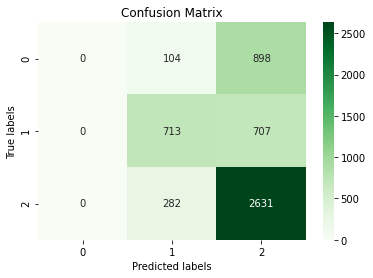

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Greens'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['pos', 'neg', 'neu']); 
ax.yaxis.set_ticklabels(['pos', 'neg', 'neu']);

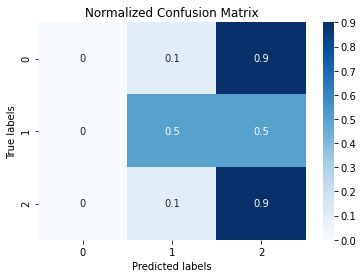

In [0]:
# Normalized
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmn = np.around(cmn, decimals=2)
ax = plt.subplot()
sns.heatmap(cmn, annot=True, ax = ax, fmt='g', cmap='Blues'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
ax.set_title('Normalized Confusion Matrix'); 
ax.xaxis.set_ticklabels(['pos', 'neg', 'neu']); 
ax.yaxis.set_ticklabels(['pos', 'neg', 'neu']);